# GeoPandas

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atsuyaourt/gis-python-tutorial/blob/main/book/07_geopandas.ipynb)

## Overview

[GeoPandas](https://geopandas.org) is an open-source Python library that simplifies working with geospatial data by extending Pandas data structures. It seamlessly integrates geospatial operations with a pandas-like interface, allowing for the manipulation of geometric types such as points, lines, and polygons. GeoPandas combines the functionalities of Pandas and Shapely, enabling geospatial operations like spatial joins, buffering, intersections, and projections with ease.

## Concepts

The core data structures in GeoPandas are `GeoDataFrame` and `GeoSeries`. A `GeoDataFrame` extends the functionality of a Pandas DataFrame by adding a geometry column, allowing spatial data operations on geometric shapes. The `GeoSeries` handles geometric data (points, polygons, etc.).

A `GeoDataFrame` can have multiple geometry columns, but only one is considered the active geometry at any time. All spatial operations are applied to this active geometry, accessible via the `.geometry` attribute.

## Installing and Importing GeoPandas

Before we begin, make sure you have geopandas installed. You can install it using:

In [ ]:
# %pip install geopandas

Once installed, import GeoPandas and other necessary libraries:

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Creating GeoDataFrames

A GeoDataFrame is a tabular data structure that contains a `geometry` column, which holds the geometric shapes. You can create a GeoDataFrame from a list of geometries or from a pandas DataFrame.

In [2]:
# Creating a GeoDataFrame from scratch
data = {
    "name": ["Manila", "Quezon City", "Cebu", "Davao"],
    "region": ["NCR", "NCR", "VII", "XI"],
    "lat": [14.5995, 14.6760, 10.3157, 7.1907],
    "lon": [120.9842, 121.0437, 123.8854, 125.4553],
    "population": [1_846_513, 2_960_048, 964_169, 1_776_949],
}

df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf

,name,region,lat,lon,population,geometry
0,Manila,NCR,14.5995,120.9842,1846513,POINT (120.9842 14.5995)
1,Quezon City,NCR,14.6760,121.0437,2960048,POINT (121.0437 14.676)
2,Cebu,VII,10.3157,123.8854,964169,POINT (123.8854 10.3157)
3,Davao,XI,7.1907,125.4553,1776949,POINT (125.4553 7.1907)


## Reading and Writing Geospatial Data

GeoPandas allows reading and writing a variety of geospatial formats, such as Shapefiles, GeoJSON, and more. We'll use a GeoJSON dataset of NCR boundaries.

### Reading a GeoJSON File

We'll load the NCR dataset from a GeoJSON file hosted online.

In [2]:
url = "https://raw.githubusercontent.com/faeldon/philippines-json-maps/refs/heads/master/2023/geojson/regions/lowres/provdists-region-1300000000.0.001.json"
gdf = gpd.read_file(url)
utm_crs = gdf.estimate_utm_crs()  # Automatically suggests the UTM zone
gdf = gdf.to_crs(utm_crs)
gdf.head()

,adm1_psgc,adm2_psgc,adm2_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry
0,1300000000,1303900000,"NCR, City of Manila, First District (Not a Pro...",Dist,65456,41975413,65,41,"POLYGON ((283722.929 1619082.846, 280037.46 16..."
1,1300000000,1307400000,"NCR, Second District (Not a Province)",Dist,103620,233830886,103,233,"POLYGON ((295625.087 1607412.928, 294965.197 1..."
2,1300000000,1307500000,"NCR, Third District (Not a Province)",Dist,103619,126134749,103,126,"POLYGON ((295452.647 1633223.519, 290698.238 1..."
3,1300000000,1307600000,"NCR, Fourth District (Not a Province)",Dist,102146,196785340,102,196,"POLYGON ((295625.087 1607412.928, 289955.426 1..."


This `GeoDataFrame` contains several columns, including `adm2_en`, which represents the names of the districts, and `geometry`, which stores the polygons for each distric.

### Writing to a GeoJSON File

GeoPandas also supports saving geospatial data back to disk. For example, we can save the GeoDataFrame as a new GeoJSON file:

In [4]:
output_file = "ncr.geojson"
gdf.to_file(output_file, driver="GeoJSON")
print(f"GeoDataFrame has been written to {output_file}")

GeoDataFrame has been written to ncr.geojson


Similarly, you can write GeoDataFrames to other formats, such as Shapefiles, GeoPackage, and more.

In [5]:
output_file = "ncr.shp"
gdf.to_file(output_file)

In [6]:
output_file = "ncr.gpkg"
gdf.to_file(output_file, driver="GPKG")

## Simple Accessors and Methods

Now that we have the data, let's explore some simple GeoPandas methods to manipulate and analyze the geometric data.

### Measuring Area

We can calculate the area of each district. GeoPandas automatically calculates the area of each polygon:

In [3]:
# Set BoroName as the index for easier reference
gdf = gdf.set_index("adm2_psgc")

# Calculate the area
gdf["area"] = gdf.area
gdf

,adm1_psgc,adm2_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry,area
adm2_psgc,,,,,,,,,
1303900000,1300000000,"NCR, City of Manila, First District (Not a Pro...",Dist,65456,41975413,65,41,"POLYGON ((283722.929 1619082.846, 280037.46 16...",4.201781e+07
1307400000,1300000000,"NCR, Second District (Not a Province)",Dist,103620,233830886,103,233,"POLYGON ((295625.087 1607412.928, 294965.197 1...",2.233504e+08
1307500000,1300000000,"NCR, Third District (Not a Province)",Dist,103619,126134749,103,126,"POLYGON ((295452.647 1633223.519, 290698.238 1...",1.249099e+08
1307600000,1300000000,"NCR, Fourth District (Not a Province)",Dist,102146,196785340,102,196,"POLYGON ((295625.087 1607412.928, 289955.426 1...",1.895737e+08


### Getting Polygon Boundaries and Centroids

To get the boundary (lines) and centroid (center point) of each polygon:

In [4]:
# Get the boundary of each polygon
gdf["boundary"] = gdf.boundary

# Get the centroid of each polygon
gdf["centroid"] = gdf.centroid

gdf[["boundary", "centroid"]]

,boundary,centroid
adm2_psgc,,
1303900000,"LINESTRING (283722.929 1619082.846, 280037.46 ...",POINT (283150.685 1615096.15)
1307400000,"LINESTRING (295625.087 1607412.928, 294965.197...",POINT (291814.193 1621220.357)
1307500000,"LINESTRING (295452.647 1633223.519, 290698.238...",POINT (284291.567 1627188.261)
1307600000,"LINESTRING (295625.087 1607412.928, 289955.426...",POINT (287184.674 1601809.744)


### Measuring Distance

We can also measure the distance from each district's centroid to a reference point, such as the centroid of the 1st District.

In [5]:
# Use 1st District's centroid as the reference point
centroid0 = gdf.loc[1303900000, "centroid"]

# Calculate the distance from each centroid to the 1st District
gdf["distance_to_1st"] = gdf["centroid"].distance(centroid0)
gdf[["centroid", "distance_to_1st"]]

,centroid,distance_to_1st
adm2_psgc,,
1303900000,POINT (283150.685 1615096.15),0.000000
1307400000,POINT (291814.193 1621220.357),10609.537031
1307500000,POINT (284291.567 1627188.261),12145.812779
1307600000,POINT (287184.674 1601809.744),13885.303277


### Calculating Mean Distance

We can calculate the mean distance between the district centroids and 1st District:

In [6]:
mean_distance = gdf["distance_to_1st"].mean()
print(f"Mean distance to 1st district: {mean_distance} units")

Mean distance to 1st district: 9160.16327191259 units


## Plotting Geospatial Data

GeoPandas integrates with Matplotlib for easy plotting of geospatial data. Let's create some maps to visualize the data.

### Plotting the Area of Each Borough

We can color the boroughs based on their area and display a legend:

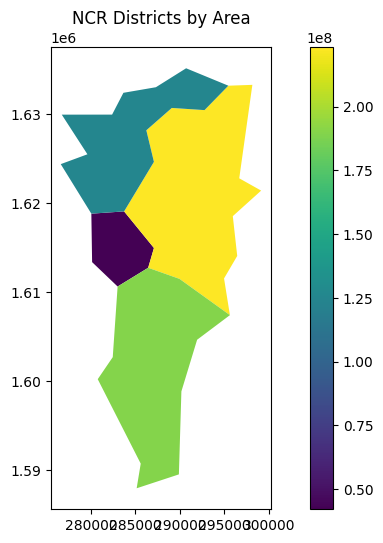

In [7]:
gdf.plot("area", legend=True, figsize=(10, 6))
plt.title("NCR Districts by Area")
plt.show()

### Plotting Centroids and Boundaries

We can also plot the centroids and boundaries:

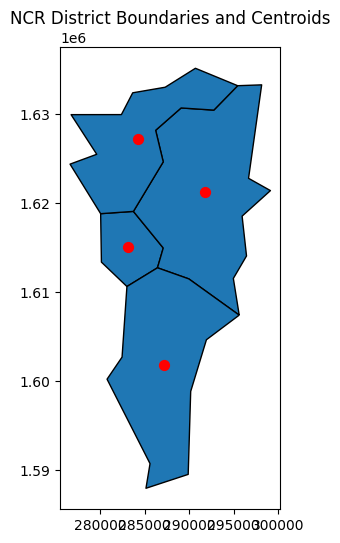

In [8]:
# Plot the boundaries and centroids
ax = gdf["geometry"].plot(figsize=(10, 6), edgecolor="black")
gdf["centroid"].plot(ax=ax, color="red", markersize=50)
plt.title("NCR District Boundaries and Centroids")
plt.show()

You can also explore your data interactively using `GeoDataFrame.explore()`, which behaves in the same way `plot()` does but returns an interactive map instead.

In [6]:
gdf.explore("area", legend=False)

## Geometry Manipulations

GeoPandas provides several methods for manipulating geometries, such as buffering (creating a buffer zone around geometries) and computing convex hulls (the smallest convex shape enclosing the geometries).

### Buffering Geometries

We can create a buffer zone around each district:

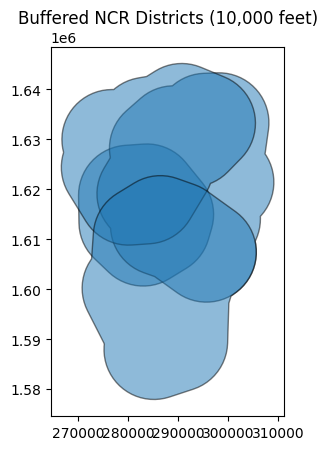

In [8]:
# Buffer the districts by 10000 feet
gdf["buffered"] = gdf.buffer(10000)

# Plot the buffered geometries
gdf["buffered"].plot(alpha=0.5, edgecolor="black")
plt.title("Buffered NCR Districts (10,000 feet)")
plt.show()

### Convex Hulls

The convex hull is the smallest convex shape that can enclose a geometry. Let's calculate the convex hull for each district:

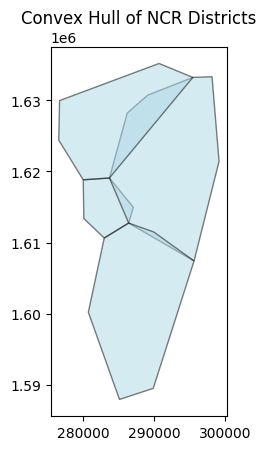

In [9]:
# Calculate convex hull
gdf["convex_hull"] = gdf.convex_hull

# Plot the convex hulls
gdf["convex_hull"].plot(alpha=0.5, color="lightblue", edgecolor="black")
plt.title("Convex Hull of NCR Districts")
plt.show()

## Spatial Queries and Relations

We can also perform spatial queries to examine relationships between geometries. For instance, we can check which boroughs are within a certain distance of Manhattan.

### Checking for Intersections

We can find which boroughs' buffered areas intersect with the original geometry of Manhattan:

In [10]:
# Get the geometry of Manhattan
geom0 = gdf.loc[1303900000, "geometry"]

# Check which buffered districts intersect with 1st District's geometry
gdf["intersects_1st"] = gdf["buffered"].intersects(geom0)
gdf[["intersects_1st"]]

,intersects_1st
adm2_psgc,
1303900000,True
1307400000,True
1307500000,True
1307600000,True


### Checking for Containment

Similarly, we can check if the centroids are contained within the borough boundaries:

In [11]:
# Check if centroids are within the original district geometries
gdf["centroid_within_district"] = gdf["centroid"].within(gdf["geometry"])
gdf[["centroid_within_district"]]

,centroid_within_district
adm2_psgc,
1303900000,True
1307400000,True
1307500000,True
1307600000,True


## Exercises

1. Create a GeoDataFrame containing a list of countries and their capital cities. Add a geometry column with the locations of the capitals.
2. Load a shapefile of your choice, filter the data to only include a specific region or country, and save the filtered GeoDataFrame to a new file.
3. Perform a spatial join between two GeoDataFrames: one containing polygons (e.g., country borders) and one containing points (e.g., cities). Find out which points fall within which polygons.
4. Plot a map showing the distribution of a particular attribute (e.g., population) across different regions.